# Make Transition Table

## Read Data and Make Trajectories

In [1]:
import anndata
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wot
import math
import ipywidgets as widgets


In [2]:
DATA_PATH = "data/"

ADATA_PATH = DATA_PATH + 'HERY_adata_anno_v2.h5ad'
TMAP_PATH = DATA_PATH + 'tmap/'
PLT_SAVE_DIR = 'figs_out/'
UMAP_PATH = DATA_PATH + 'HERY_umap.csv'
VAR_PATH = DATA_PATH + 'HERY_var.csv'


In [3]:
T_FINAL = 54

In [4]:
adata = anndata.read_h5ad(ADATA_PATH)
tmap_model = wot.tmap.TransportMapModel.from_directory(TMAP_PATH)

In [5]:
print(adata.obs.head(10))

                         hpf  seurat_clusters            type    UMAP_1  \
6hpf_AAACCCAAGCACTCTA.1    6                8  Early Ectoderm -7.780217   
6hpf_AAACCCAAGGGCGAAG.1    6                8  Early Ectoderm -8.518348   
6hpf_AAACCCACAGCTGTGC.1    6                8  Early Ectoderm -7.851418   
6hpf_AAACCCACATTGTAGC.1    6                8  Early Ectoderm -8.052371   
6hpf_AAACCCAGTAATCAAG.1    6                8  Early Ectoderm -8.490778   
6hpf_AAACGAAAGGCGTCCT.1    6                8  Early Ectoderm -8.629979   
6hpf_AAACGAACAGCTCGGT.1    6                8  Early Ectoderm -9.063845   
6hpf_AAACGAACATCATCCC.1    6                8  Early Ectoderm -7.094436   
6hpf_AAACGAATCGGTCGAC.1    6                8  Early Ectoderm -7.807825   
6hpf_AAACGAATCTCTATGT.1    6                8  Early Ectoderm -7.002912   

                            UMAP_2  
6hpf_AAACCCAAGCACTCTA.1  10.384424  
6hpf_AAACCCAAGGGCGAAG.1  10.977668  
6hpf_AAACCCACAGCTGTGC.1   9.558343  
6hpf_AAACCCACATTGTAGC.1   

In [6]:
# Create a cell types dictionary
types = list(adata.obs['type'].unique())
types.sort()

cell_sets = {}
for t in types:
    cell_sets[t] = list(adata.obs.index[adata.obs.type == t])

In [95]:
# Generate the fate probabilities for the types
type_target_destinations = tmap_model.population_from_cell_sets(cell_sets, at_time=T_FINAL)
type_fate_ds = tmap_model.fates(type_target_destinations)

In [96]:
populations = tmap_model.population_from_cell_sets(cell_sets, at_time=54)


In [97]:
trajectory_ds = tmap_model.trajectories(populations)

In [37]:
# Load embedding coordinates
# Read the umap for the cells and add it on
coord_df = pd.read_csv(UMAP_PATH, index_col=0)


In [38]:
nbins = 500
xrange = coord_df['UMAP_1'].min(), coord_df['UMAP_1'].max()
yrange = coord_df['UMAP_2'].min(), coord_df['UMAP_2'].max()
coord_df['UMAP_1'] = np.floor(
    np.interp(coord_df['UMAP_1'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['UMAP_2'] = np.floor(
    np.interp(coord_df['UMAP_2'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds.obs = trajectory_ds.obs.join(coord_df)

In [39]:
trajectory_ds.obs.copy()

,day,UMAP_1,UMAP_2
6hpf_AAACCCAAGCACTCTA.1,6.0,97,483
6hpf_AAACCCAAGGGCGAAG.1,6.0,82,495
6hpf_AAACCCACAGCTGTGC.1,6.0,96,466
6hpf_AAACCCACATTGTAGC.1,6.0,92,468
6hpf_AAACCCAGTAATCAAG.1,6.0,83,487
...,...,...,...
60hpf_TTTGTTGTCCATCTCG.1,60.0,356,350
60hpf_TTTGTTGTCGCAATTG.1,60.0,280,346
60hpf_TTTGTTGTCTACTGCC.1,60.0,344,355
60hpf_TTTGTTGTCTCATTGT.1,60.0,385,392


In [41]:
#Load expression data
adata = anndata.read_h5ad(ADATA_PATH)

#Compute trends for all genes
trajectory_trends = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds, adata)

# Save each trajectory in a separate file
for i in range(len(trajectory_trends)):
    wot.io.write_dataset(trajectory_trends[i], "lineage_trends_54/" + trajectory_ds.var.index[i] + '_trends.txt')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModif

In [42]:
trajectory_trend_datasets = []
trajectory_names = []

for i in range(trajectory_ds.shape[1]):
    trajectory_names.append(trajectory_ds.var.index[i]) 
    trajectory_trend_datasets.append(wot.io.read_dataset("lineage_trends_54/" + trajectory_ds.var.index[i] + '_trends.txt'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Library/Frameworks/Python.framework

# Make the transition table

In [7]:
# Transition Table

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import wot

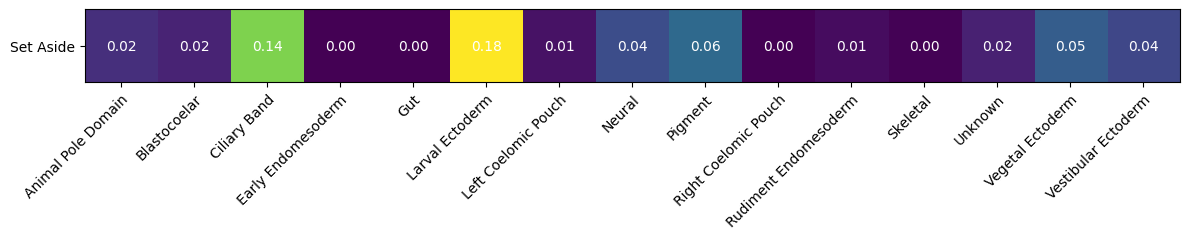

In [8]:
start_populations = tmap_model.population_from_cell_sets(cell_sets, at_time=6)
end_populations = tmap_model.population_from_cell_sets(cell_sets, at_time=60)

# Select the correct row of the matrix to highlight the undifferentiated cell population
transition_table = tmap_model.transition_table(start_populations, end_populations)[10]

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(transition_table.X)

# We want to show all ticks...
ax.set_xticks(np.arange(len(transition_table.var_names)))
ax.set_yticks(np.arange(len(transition_table.obs_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(transition_table.var_names)
ax.set_yticklabels(transition_table.obs_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(transition_table.shape[0]):
    for j in range(transition_table.shape[1]):
        text = ax.text(j, i, '{:.2f}'.format(transition_table.X[i, j]),
                       ha="center", va="center", color="w")
fig.tight_layout()